In [1]:
import pandas as pd
# reading data using pandas.
df=pd.read_csv(r'C:\Users\pritam\Desktop\iris.txt', header=None)
df.head()

,0,1,2
0,5.9,3.0,1
1,6.9,3.1,1
2,6.6,2.9,1
3,4.6,3.2,-1
4,6.0,2.2,1


In [2]:
# checking shape of the dataset
df.shape

(150, 3)

In [3]:
from sklearn.model_selection import train_test_split
X=df[[0,1]]
X.head()

,0,1
0,5.9,3.0
1,6.9,3.1
2,6.6,2.9
3,4.6,3.2
4,6.0,2.2


In [4]:
y=df[2]
y.head()

0    1
1    1
2    1
3   -1
4    1
Name: 2, dtype: int64

In [5]:
# now let's split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
# now model implementation
from sklearn.svm import SVC
model=SVC()

In [7]:
# fitting the model
model.fit(X_train,y_train)

C:\Users\pritam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
# testing the model using test dataset
model.score(X_test,y_test)

1.0

In [9]:
# prediction
y_predict=model.predict(X_test)
y_predict

array([-1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1], dtype=int64)

In [10]:
# let's evaluate the prediction and f1-Score.
from sklearn.metrics import classification_report
result=classification_report(y_test,y_predict)
print(result)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
# tunning hyper_parameter.
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param={'kernel':('linear','poly','rbf'),
       'C':[1,2,3],
       'gamma':['auto','scale']}

In [12]:
# passing parameters for 5-fold-validation
Grids=GridSearchCV(model,param,cv=5)
Grids.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 2, 3], 'gamma': ['auto', 'scale'],
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [13]:
Grids.cv_results_

{'mean_fit_time': array([0.00500302, 0.00200152, 0.00220461, 0.00180116, 0.00220098,
        0.00200171, 0.00200129, 0.00160112, 0.00240941, 0.00260139,
        0.00280185, 0.00220213, 0.00220108, 0.002601  , 0.00220098,
        0.00260243, 0.00300131, 0.00320215]),
 'std_fit_time': array([2.09908458e-03, 8.95268742e-04, 3.98825681e-04, 4.00376416e-04,
        4.00830648e-04, 9.70220087e-07, 6.57274664e-07, 4.90290765e-04,
        4.84200897e-04, 1.20079521e-03, 7.48889105e-04, 3.99424535e-04,
        3.99353298e-04, 4.90448438e-04, 4.00473941e-04, 4.89572071e-04,
        6.32560834e-04, 7.48660570e-04]),
 'mean_score_time': array([0.00200663, 0.00140076, 0.00119829, 0.00100093, 0.00080147,
        0.00080075, 0.0008009 , 0.00120091, 0.00099282, 0.00120106,
        0.00120177, 0.00120139, 0.00100102, 0.0016016 , 0.00120139,
        0.00100055, 0.00140176, 0.00120096]),
 'std_score_time': array([9.01394613e-04, 4.90232347e-04, 4.00939898e-04, 2.78041453e-07,
        4.00735593e-04, 4.00

In [14]:
df1=pd.DataFrame(Grids.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005003,2.099085e-03,0.002007,9.013946e-04,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",1.0,1.0,1.0,0.958333,1.0,0.991667,0.016667,1
1,0.002002,8.952687e-04,0.001401,4.902323e-04,1,auto,poly,"{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}",1.0,1.0,1.0,0.958333,1.0,0.991667,0.016667,1
2,0.002205,3.988257e-04,0.001198,4.009399e-04,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",1.0,1.0,1.0,0.958333,1.0,0.991667,0.016667,1
3,0.001801,4.003764e-04,0.001001,2.780415e-07,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",1.0,1.0,1.0,0.958333,1.0,0.991667,0.016667,1
4,0.002201,4.008306e-04,0.000801,4.007356e-04,1,scale,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",1.0,1.0,1.0,0.958333,1.0,0.991667,0.016667,1
5,0.002002,9.702201e-07,0.000801,4.003764e-04,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",1.0,1.0,1.0,0.958333,1.0,0.991667,0.016667,1
6,0.002001,6.572747e-07,0.000801,4.004481e-04,2,auto,linear,"{'C': 2, 'gamma': 'auto', 'kernel': 'linear'}",1.0,1.0,1.0,0.958333,1.0,0.991667,0.016667,1
7,0.001601,4.902908e-04,0.001201,4.004242e-04,2,auto,poly,"{'C': 2, 'gamma': 'auto', 'kernel': 'poly'}",1.0,1.0,1.0,0.958333,1.0,0.991667,0.016667,1
8,0.002409,4.842009e-04,0.000993,7.989549e-06,2,auto,rbf,"{'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}",1.0,1.0,1.0,0.958333,1.0,0.991667,0.016667,1
9,0.002601,1.200795e-03,0.001201,4.001141e-04,2,scale,linear,"{'C': 2, 'gamma': 'scale', 'kernel': 'linear'}",1.0,1.0,1.0,0.958333,1.0,0.991667,0.016667,1


In [15]:
# displaying few columns based on the question
df1[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.991667
1,1,poly,0.991667
2,1,rbf,0.991667
3,1,linear,0.991667
4,1,poly,0.991667
5,1,rbf,0.991667
6,2,linear,0.991667
7,2,poly,0.991667
8,2,rbf,0.991667
9,2,linear,0.991667


In [16]:
# just checking other information 
#dir(Grids)

In [17]:
# plotting blue and red based on the target variable
df_blue=df[df[2]==1]
df_red=df[df[2]==-1]
df_blue.head()

,0,1,2
0,5.9,3.0,1
1,6.9,3.1,1
2,6.6,2.9,1
4,6.0,2.2,1
6,6.5,3.0,1


Text(0, 0.5, '1 Index for Y_value')

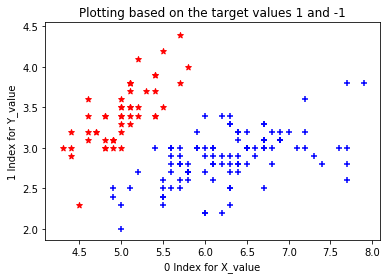

In [18]:
# scatter plot based on the target variable
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_blue[0],df_blue[1],color="blue",marker='+')
plt.scatter(df_red[0],df_red[1],color='red',marker='*')
plt.title("Plotting based on the target values 1 and -1")
plt.xlabel("0 Index for X_value")
plt.ylabel("1 Index for Y_value")

C:\Users\pritam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


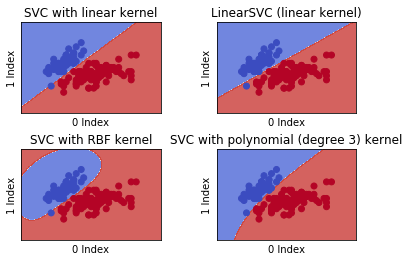

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Reference:https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html 
# i copied and pasted and did little change on x any y valuse using iloc function for slicing.
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('0 Index')
    plt.ylabel('1 Index')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [ ]:
# Thanks!!!